### 네이버 영화 평점 데이터
- 영화명, 평점을 가져오자!
- 네이버 영화페이지 > 영화랭킹 > 평점순(현재상영하는영화)

In [3]:
# 환경세팅
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

In [6]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221214'
# html 요청
res = req.get(url, headers = header)

# 파이썬 객체 변환
html = bs(res.text, 'lxml')

In [18]:
# 영화명, 평점데이터 수집 후 출력해보기
# 길이 확인 꼭 하기
movie_name = html.select('.title > .tit5 > a')
movie_point = html.select('.point')

In [19]:
print(len(movie_name), len(movie_point))

50 50


In [23]:
movie_nameLst = []
movie_pointLst = []
rank_lst = []

for i in range(len(movie_name)):
    rank_lst.append(i+1)
    movie_nameLst.append(movie_name[i].text)
    movie_pointLst.append(movie_point[i].text)
print(len(movie_nameLst), len(movie_pointLst))

50 50


In [30]:
# 참고!!

# list comprehension 문법 - 리스트 내포(리스트 안에 for문이 있다)
# list의 각 요소를 반복하기 위해 for 루프와 함께 실행되는 표현식
# [i for i in 반복대상]
# 1. 반복문보다 시간이 효율적, 메모리공간도 효율적
# 2. 더 적은 수의 코드로 짤 수 있다(가독성이 좋다)
movie_nameLst2 = [i.text for i in movie_name]
movie_pointLst2 = [i.text for i in movie_point]
movie_pointLst2

['9.37',
 '9.30',
 '9.28',
 '9.24',
 '9.23',
 '9.23',
 '9.22',
 '9.18',
 '9.16',
 '9.13',
 '9.13',
 '9.09',
 '9.04',
 '9.03',
 '9.00',
 '8.95',
 '8.95',
 '8.92',
 '8.81',
 '8.77',
 '8.76',
 '8.75',
 '8.72',
 '8.68',
 '8.66',
 '8.62',
 '8.61',
 '8.46',
 '8.44',
 '8.42',
 '8.38',
 '8.36',
 '8.36',
 '8.35',
 '8.31',
 '8.25',
 '8.14',
 '8.12',
 '8.12',
 '7.97',
 '7.93',
 '7.89',
 '7.83',
 '7.72',
 '7.68',
 '7.58',
 '6.88',
 '6.79',
 '6.75',
 '6.40']

In [34]:
# DataFrame으로 구성하기
movie_dict = {'순위' : rank_lst, '영화명' : movie_nameLst, '평점' :movie_pointLst}
movie_df = pd.DataFrame(movie_dict)
movie_df2 = movie_df.set_index('순위')
movie_df2.head()

,영화명,평점
순위,,
1,올빼미,9.37
2,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,9.30
3,공동경비구역 JSA,9.28
4,바람과 함께 사라지다,9.24
5,극장판 주술회전 0,9.23


### 페이지를 이동하면서 날짜명 영화명, 평점 데이터 수집하기
- 20221210 - 20221214 (5일) 페이지 접근
- 각 페이지마다 영화명, 평점 데이터 접근
- 각 페이지에 접근하기위해서 url을 활용 : 날짜 값을 변경

In [39]:
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221214'
# dat_lst = ['20221210','20221211', ...]
day_lst = pd.date_range(start = '2022-12-10', periods = 5) # period : 범위 (5일정도의 날짜범위를 가져올게!)

# .strftime(%Y%m%d) : 날짜데이터 표현하는 방식 %Y -> 년도를 네글자 다 출력할게(2022) ==> 문자열 포매팅 %, format(),  f-문자열
day_lst[0].strftime('%Y%m%d')

'20221210'

In [41]:
day_lst[0]

Timestamp('2022-12-10 00:00:00', freq='D')

In [42]:
day_lst2 = [i.strftime('%Y%m%d') for i in day_lst]
day_lst2

['20221210', '20221211', '20221212', '20221213', '20221214']

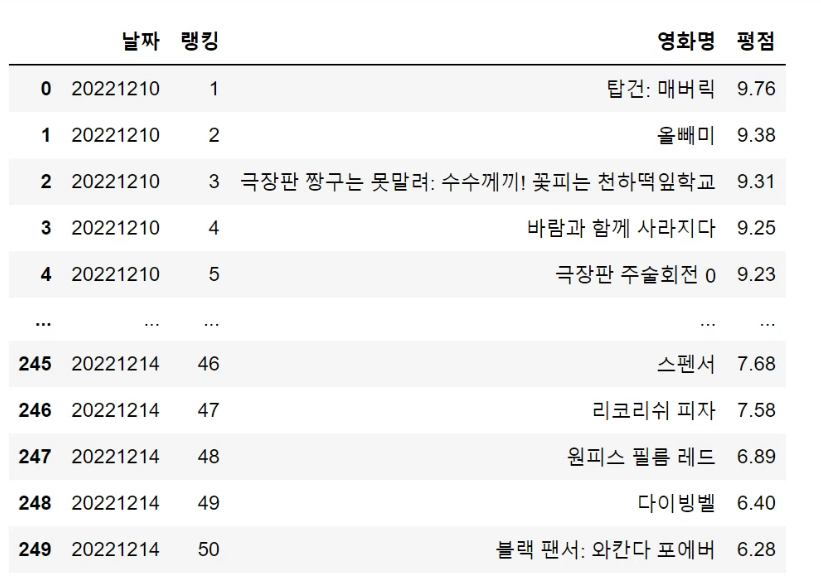

In [81]:
movie_nameLst2 = []
movie_pointLst2 = []
rank_lst2 = []
movie_day = []

# 20221210 - 20221214(5일) 페이지 접근하는 코드
for day in day_lst2:
#     url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur'
#     res = req.get(url, headers = header, params = {'date':i}) => params 하게 되면 &가 자동으로 붙음
    url = f'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={day}'
    res = req.get(url, headers = header)
#     print(res.url) # .url ==> url값을 확인할게!
    html = bs(res.text, 'lxml')
    
    # 영화명, 평점 데이터 수집
    movie_name = html.select('.title > .tit5 > a')
    movie_point = html.select('.point')
    
    
    for i in range(len(movie_name)):
        rank_lst2.append(i+1)
        movie_nameLst2.append(movie_name[i].text)
        movie_pointLst2.append(movie_point[i].text)
        movie_day.append(day)
    print(len(movie_nameLst2))        

50
100
150
200
250


In [86]:
# movie_df = pd.DataFrame({'날짜':movie_day, '순위' : rank_lst2, '영화명' : movie_nameLst2, '평점' :movie_pointLst2})
movie_dict2 = {'날짜' : movie_day, '순위' : rank_lst2, '영화명' : movie_nameLst2, '평점' :movie_pointLst2}
movie_df3 = pd.DataFrame(movie_dict2)
movie_df4 = movie_df3.set_index('순위')
movie_df4

,날짜,영화명,평점
순위,,,
1,20221210,탑건: 매버릭,9.76
2,20221210,올빼미,9.38
3,20221210,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,9.31
4,20221210,바람과 함께 사라지다,9.25
5,20221210,극장판 주술회전 0,9.23
...,...,...,...
46,20221214,리코리쉬 피자,7.58
47,20221214,원피스 필름 레드,6.88
48,20221214,프레이 포 더 데블,6.79


In [93]:
# 2022년 12월 12일 날짜에 대한 영화 정보 출력해보기
# 불리언 인덱싱 사용
# movie_df4[movie_df4['날짜'] == '20221212']['영화명']
movie_df4.loc[movie_df4['날짜'] == '20221212','영화명']

순위
1                           탑건: 매버릭
2                               올빼미
3     극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교
4                        공동경비구역 JSA
5                       바람과 함께 사라지다
6                        극장판 주술회전 0
7                                벤허
8                          인생은 아름다워
9                            어바웃 타임
10                               귀향
11                             러브레터
12                               코다
13                          오즈의 마법사
14                               탄생
15                           비긴 어게인
16                      타오르는 여인의 초상
17                             보디가드
18                             윤희에게
19                                시
20                          러브 액츄얼리
21                     매드맥스: 분노의 도로
22                          너의 이름은.
23                       찬실이는 복도 많지
24                        한산: 용의 출현
25         오늘 밤, 세계에서 이 사랑이 사라진다 해도
26                               벌새
27                           헤어질 결심
28                       